In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta

In [2]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df1 = pd.read_excel('biometria.xlsx', sheet_name='Página1')
print(df1.head(10))

   Index   peso  comprimento_Total  comprimento_Padrao comprimento_Cabeça  \
0      1  51.45               14.3                12.2                  4   
1      2  37.15               12.4                10.9                3.8   
2      3  47.26               13.7                11.2                3.4   
3      4  36.67               12.9                11.1                3.7   
4      5  45.48               13.2                11.3                3.8   
5      6  36.77               12.5                10.8                3.2   
6      7  32.79               12.0                10.2                3.4   
7      8  35.52               12.4                10.8                3.4   
8      9  35.58               12.3                11.0                3.4   
9     10  42.88               13.2                11.2                3.8   

   altura  espessura       data  
0     4.1        1.9 2024-02-28  
1     3.2        1.2 2024-02-28  
2     4.0        1.7 2024-02-28  
3     3.7       

In [3]:
df1 = df1.drop(columns=[
'data', 
'Index'
])
df1.head()

,peso,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,espessura
0,51.45,14.3,12.2,4,4.1,1.9
1,37.15,12.4,10.9,3.8,3.2,1.2
2,47.26,13.7,11.2,3.4,4.0,1.7
3,36.67,12.9,11.1,3.7,3.7,1.6
4,45.48,13.2,11.3,3.8,4.5,1.6


In [4]:
#from pycaret.datasets import get_data
#boston = get_data('boston')
from pycaret.regression import *
exp_name = setup(data = df1,  target = 'peso')
best_model = compare_models()

,Description,Value
0,Session id,5372
1,Target,peso
2,Target type,Regression
3,Original data shape,"(360, 6)"
4,Transformed data shape,"(360, 6)"
5,Transformed train set shape,"(251, 6)"
6,Transformed test set shape,"(109, 6)"
7,Numeric features,4
8,Categorical features,1
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,3.9531,31.0741,5.5164,0.9781,0.0563,0.0459,0.1840
et,Extra Trees Regressor,3.9200,32.6407,5.6401,0.9769,0.0564,0.0450,0.1390
lightgbm,Light Gradient Boosting Machine,4.2834,35.8870,5.8896,0.9751,0.0612,0.0504,0.1380
gbr,Gradient Boosting Regressor,4.2835,36.6478,6.0086,0.9748,0.0607,0.0494,0.1110
ada,AdaBoost Regressor,4.5508,38.5863,6.1364,0.9729,0.0722,0.0583,0.1080
xgboost,Extreme Gradient Boosting,4.6020,45.2694,6.6749,0.9678,0.0673,0.0531,0.1700
dt,Decision Tree Regressor,5.2205,56.6535,7.4420,0.9605,0.0740,0.0597,0.0490
lasso,Lasso Regression,5.8908,72.0845,8.1436,0.9488,0.1007,0.0776,0.0480
llar,Lasso Least Angle Regression,5.9189,75.9682,8.2696,0.9460,0.1013,0.0780,0.0500
knn,K Neighbors Regressor,5.8529,105.8982,9.6302,0.9256,0.1057,0.0727,0.0550


In [5]:
rf = create_model('rf')

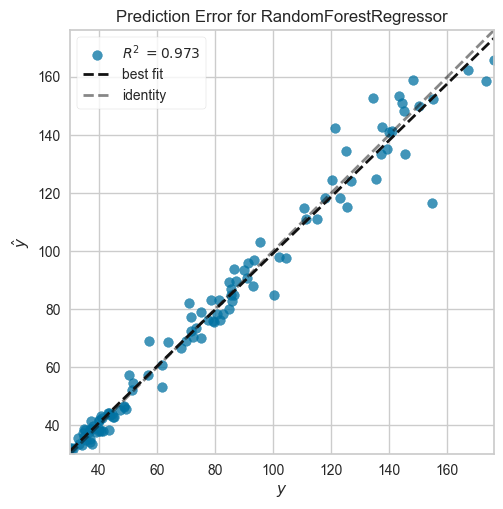

In [6]:
plot_model(rf, plot = 'error')

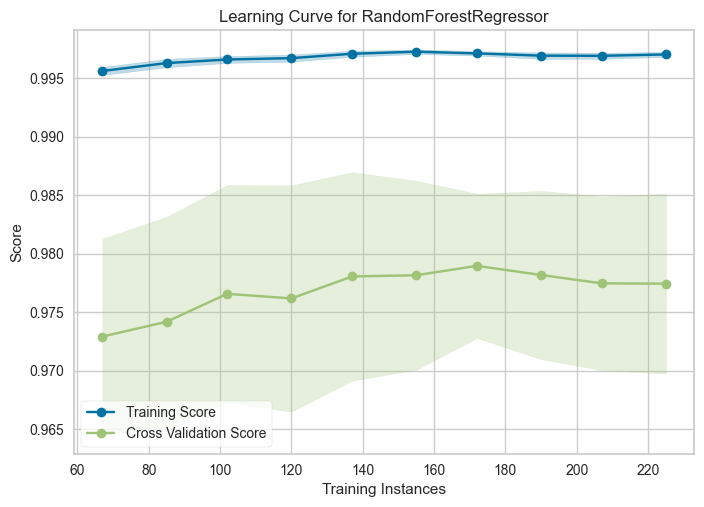

In [7]:
plot_model(rf, plot = 'learning')

In [8]:
#plot_model(rf, plot = 'tree')

In [9]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [10]:
pred_holdout = predict_model(rf)

In [11]:
#pred_unseen = predict_model(rf, data = unseen_dataframe)

NameError: name 'unseen_dataframe' is not defined

In [ ]:
tuned_rf = tune_model(rf)

In [ ]:
#theta = exp.create_model('theta')
#exp.plot_model(plot = 'decomp',
#               data_kwargs = {'type' : 'multiplicative'},
#               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":50})
#exp.plot_model(estimator = theta, plot = 'forecast', 
#               data_kwargs = {'fh' : 8},
#               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":50})
#exp.predict_model(theta, fh = 8)

#### weight prediction 
#### Realizar um codigo padrao com avaliacao de modelos, tuning, evaluation, shuffle and save (retirar index)
#### realizar predicao para espessura
#### realizar a predicao do peso sem a variavel espessura
####